### Objective
To predict the profit made by a startup on the basis of expenses incurred and the state where they operate
### Tasks
Validate all the assumptions
Compute all the regression evaluation metrics
Comment on the best evaluation metrics for this problem

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('C:\\Users\\Prathamesh\\Downloads\\50_Startups.csv')

In [9]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [11]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [13]:
df.shape

(50, 5)

### Scatter plot between independent and dependent variables

Text(0, 0.5, 'Profit')

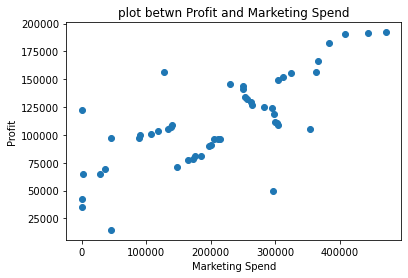

In [14]:
plt.scatter(df['Marketing Spend'],df['Profit'])
plt.title('plot betwn Profit and Marketing Spend')
plt.xlabel('Marketing Spend')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

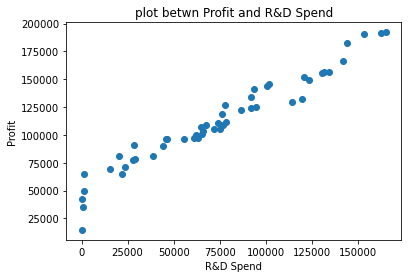

In [15]:
plt.scatter(df['R&D Spend'],df['Profit'])
plt.title('plot betwn Profit and R&D Spend')
plt.xlabel('R&D Spend')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

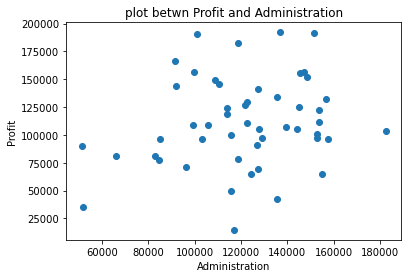

In [16]:
plt.scatter(df['Administration'],df['Profit'])
plt.title('plot betwn Profit and Administration')
plt.xlabel('Administration')
plt.ylabel('Profit')

Text(0, 0.5, 'Profit')

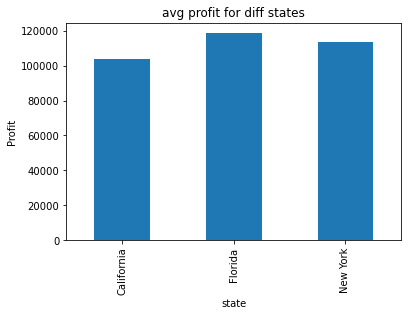

In [19]:
# check for avg profit for diff states
# fig object set
ax = df.groupby(['State'])['Profit'].mean().plot.bar()
ax.set_title('avg profit for diff states')
ax.set_xlabel('state')
ax.set_ylabel('Profit')

In [25]:
# check for count of states
df.State.value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

In [26]:
# dummy variable creation for categorical column State
df['NewYork_state'] = np.where(df['State'] == 'New York', 1,0)
df['California_state'] = np.where(df['State'] == 'California', 1,0)
df['Florida_state'] = np.where(df['State'] == 'Florida', 1,0)

In [28]:
df.drop(columns = ['State'], axis =1 , inplace = True)

In [29]:
df.head()

,R&D Spend,Administration,Marketing Spend,Profit,NewYork_state,California_state,Florida_state
0,165349.20,136897.80,471784.10,192261.83,1,0,0
1,162597.70,151377.59,443898.53,191792.06,0,1,0
2,153441.51,101145.55,407934.54,191050.39,0,0,1
3,144372.41,118671.85,383199.62,182901.99,1,0,0
4,142107.34,91391.77,366168.42,166187.94,0,0,1


### ML Modeling

In [31]:
# Dependent feature is profit
dependent_variable = 'Profit'

# list of independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable} )

In [32]:
independent_variables

['R&D Spend',
 'NewYork_state',
 'Administration',
 'Marketing Spend',
 'California_state',
 'Florida_state']

In [35]:
# array of independent variables X
X = df[independent_variables].values

In [36]:
X

array([[1.6534920e+05, 1.0000000e+00, 1.3689780e+05, 4.7178410e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.6259770e+05, 0.0000000e+00, 1.5137759e+05, 4.4389853e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.5344151e+05, 0.0000000e+00, 1.0114555e+05, 4.0793454e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.4437241e+05, 1.0000000e+00, 1.1867185e+05, 3.8319962e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.4210734e+05, 0.0000000e+00, 9.1391770e+04, 3.6616842e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.3187690e+05, 1.0000000e+00, 9.9814710e+04, 3.6286136e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.3461546e+05, 0.0000000e+00, 1.4719887e+05, 1.2771682e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.3029813e+05, 0.0000000e+00, 1.4553006e+05, 3.2387668e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.2054252e+05, 1.0000000e+00, 1.4871895e+05, 3.1161329e+05,
        0.0000000e+00, 0.0000000e+00],
       [1.2333488e+05, 0.0000000e+00,

In [37]:
# array of dependent variable y
y = df[dependent_variable].values

In [39]:
y.size

50

### Train test split

In [40]:
#importing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
 X, y, test_size=0.20, random_state=0)

In [41]:
X_train

array([[5.5493950e+04, 0.0000000e+00, 1.0305749e+05, 2.1463481e+05,
        0.0000000e+00, 1.0000000e+00],
       [4.6014020e+04, 1.0000000e+00, 8.5047440e+04, 2.0551764e+05,
        0.0000000e+00, 0.0000000e+00],
       [7.5328870e+04, 0.0000000e+00, 1.4413598e+05, 1.3405007e+05,
        0.0000000e+00, 1.0000000e+00],
       [4.6426070e+04, 0.0000000e+00, 1.5769392e+05, 2.1079767e+05,
        1.0000000e+00, 0.0000000e+00],
       [9.1749160e+04, 0.0000000e+00, 1.1417579e+05, 2.9491957e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.3029813e+05, 0.0000000e+00, 1.4553006e+05, 3.2387668e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.1994324e+05, 0.0000000e+00, 1.5654742e+05, 2.5651292e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0002300e+03, 1.0000000e+00, 1.2415304e+05, 1.9039300e+03,
        0.0000000e+00, 0.0000000e+00],
       [5.4205000e+02, 1.0000000e+00, 5.1743150e+04, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [6.5605480e+04, 1.0000000e+00,

In [42]:
y_train

array([ 96778.92,  96479.51, 105733.54,  96712.8 , 124266.9 , 155752.6 ,
       132602.65,  64926.08,  35673.41, 101004.64, 129917.04,  99937.59,
        97427.84, 126992.93,  71498.49, 118474.03,  69758.98, 152211.77,
       134307.35, 107404.34, 156991.12, 125370.37,  78239.91,  14681.4 ,
       191792.06, 141585.52,  89949.14, 108552.04, 156122.51, 108733.99,
        90708.19, 111313.02, 122776.86, 149759.96,  81005.76,  49490.75,
       182901.99, 192261.83,  42559.73,  65200.33])

In [43]:
X_test

array([[6.6051520e+04, 0.0000000e+00, 1.8264556e+05, 1.1814820e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.0067196e+05, 0.0000000e+00, 9.1790610e+04, 2.4974455e+05,
        1.0000000e+00, 0.0000000e+00],
       [1.0191308e+05, 0.0000000e+00, 1.1059411e+05, 2.2916095e+05,
        0.0000000e+00, 1.0000000e+00],
       [2.7892920e+04, 0.0000000e+00, 8.4710770e+04, 1.6447071e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.5344151e+05, 0.0000000e+00, 1.0114555e+05, 4.0793454e+05,
        0.0000000e+00, 1.0000000e+00],
       [7.2107600e+04, 1.0000000e+00, 1.2786455e+05, 3.5318381e+05,
        0.0000000e+00, 0.0000000e+00],
       [2.0229590e+04, 1.0000000e+00, 6.5947930e+04, 1.8526510e+05,
        0.0000000e+00, 0.0000000e+00],
       [6.1136380e+04, 1.0000000e+00, 1.5270192e+05, 8.8218230e+04,
        0.0000000e+00, 0.0000000e+00],
       [7.3994560e+04, 0.0000000e+00, 1.2278275e+05, 3.0331926e+05,
        0.0000000e+00, 1.0000000e+00],
       [1.4210734e+05, 0.0000000e+00,

In [44]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

### Linear Regression

In [48]:
# Standardization of data
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train[:10]

array([[0.33561668, 0.        , 0.48655174, 0.45494286, 0.        ,
        1.        ],
       [0.2782839 , 1.        , 0.3173015 , 0.43561799, 0.        ,
        0.        ],
       [0.45557444, 0.        , 0.87258866, 0.28413435, 0.        ,
        1.        ],
       [0.2807759 , 0.        , 1.        , 0.44680961, 1.        ,
        0.        ],
       [0.55488118, 0.        , 0.59103645, 0.62511553, 0.        ,
        1.        ],
       [0.7880179 , 0.        , 0.88568959, 0.68649342, 0.        ,
        1.        ],
       [0.72539353, 0.        , 0.98922572, 0.54370828, 0.        ,
        1.        ],
       [0.0060492 , 1.        , 0.6847981 , 0.0040356 , 0.        ,
        0.        ],
       [0.00327821, 1.        , 0.00432296, 0.        , 0.        ,
        0.        ],
       [0.39676926, 1.        , 0.95618996, 0.22709197, 0.        ,
        0.        ]])

In [50]:
X_test

array([[0.39946683, 0.        , 1.23448414, 0.25042853, 0.        ,
        1.        ],
       [0.60884455, 0.        , 0.38067074, 0.52936195, 1.        ,
        0.        ],
       [0.61635061, 0.        , 0.55737746, 0.48573267, 0.        ,
        1.        ],
       [0.16869099, 0.        , 0.31413763, 0.34861436, 0.        ,
        1.        ],
       [0.92798459, 0.        , 0.4685842 , 0.8646636 , 0.        ,
        1.        ],
       [0.43609283, 1.        , 0.71967718, 0.74861321, 0.        ,
        0.        ],
       [0.12234465, 1.        , 0.13781301, 0.39269043, 0.        ,
        0.        ],
       [0.36974101, 1.        , 0.95308746, 0.18698856, 0.        ,
        0.        ],
       [0.4475048 , 0.        , 0.67192074, 0.64291963, 0.        ,
        1.        ],
       [0.85943772, 0.        , 0.37692262, 0.77613557, 0.        ,
        1.        ]])

In [52]:
# linear regression
from sklearn.linear_model import LinearRegression

# cross validation
from sklearn.model_selection import cross_val_score

In [53]:
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [57]:
mse = cross_val_score(regressor,X_train,y_train,scoring ='neg_mean_squared_error',cv = 10)

mse = np.mean(mse)

mse

-125689823.34362563

In [58]:
# prediction
y_pred = regressor.predict(X_test)

In [60]:
y_pred

array([103015.20159796, 132582.27760816, 132447.73845174,  71976.09851258,
       178537.48221055, 116161.24230165,  67851.69209676,  98791.73374687,
       113969.43533012, 167921.0656955 ])

C:\Users\Prathamesh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

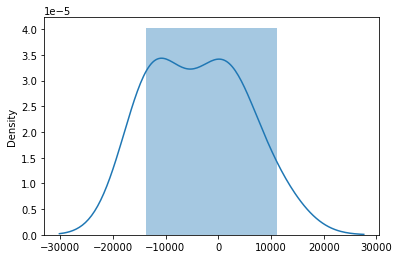

In [61]:
# testing
import seaborn as sns
sns.distplot(y_pred - y_test)

In [59]:
math.sqrt(mean_squared_error(y_test, y_pred))

9137.990152794944

In [62]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)

In [64]:
score

0.9347068473282425

In [65]:
# validatatins
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

In [66]:
# Residual = Actual - predicted
residuals_train = y_train - y_train_pred
residuals_test = y_test - y_test_pred

## Checks for heteroscedasticity

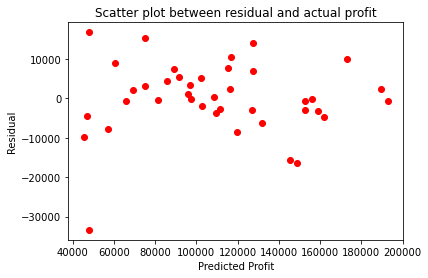

In [67]:
#Scatter plot between residual and fitted values
plt.scatter(y_train_pred ,residuals_train, c='red' )
plt.title('Scatter plot between residual and actual profit')
plt.xlabel('Predicted Profit')
plt.ylabel('Residual')
plt.show()

### 
Seems like there is no significant pattern visible. So the assumption of homoscedasticity is valid.

### Let's check if the mean of residuals is almost zero:

In [68]:
round((np.mean(residuals_train)))

0

####
mean of residual is almost zero

### Let's check for multicollinearity:

<AxesSubplot:>

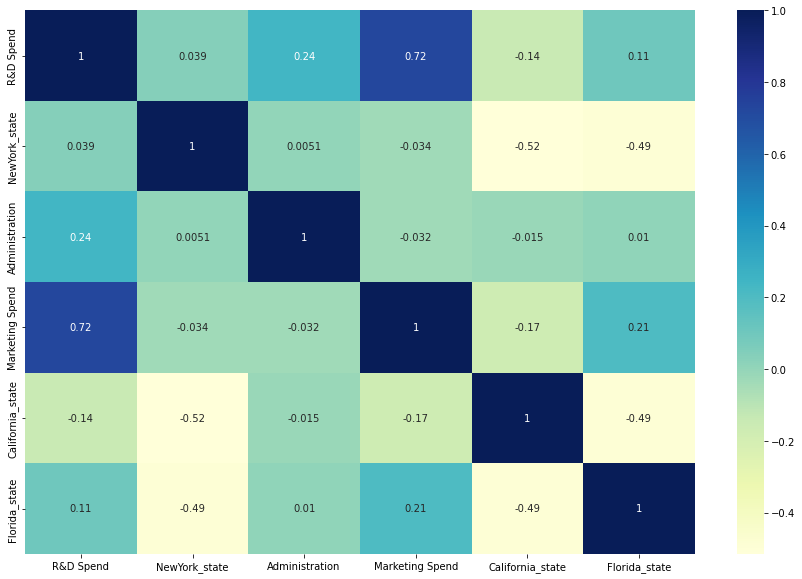

In [71]:
plt.figure(figsize=(15, 10))
sns.heatmap(df[independent_variables].corr(),  annot=True, cmap="YlGnBu")

. Correlation between marketing spend and R&D spend is very high, hence it needs attention

ii. Ignoring the correlations between binary variables (state dummy variables) as of now

### Evaluation Metrics

In [78]:
def print_metrics(actual,predicted):
    print('MSE is {}' .format(mean_squared_error(actual, predicted)))
    print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
    print('RMSE is {}'.format(r2_score(actual, predicted)))
    #print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
    print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))
  

In [79]:
# Training dataset metrics
print_metrics(y_train, y_train_pred)

MSE is 81571001.80077368
RMSE is 9031.666612578969
RMSE is 0.9501847627493607
MAPE is 11.643543574245026


In [80]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 83502864.03257735
RMSE is 9137.990152794944
RMSE is 0.9347068473282425
MAPE is 6.449754085355488


Training set errors and test set errors are almost same, so no underfitting or overfitting detected.

In [81]:
# Adjusted R2

def adjusted_r2(n, k, actual, predicted):
  return 1 - (((n-1)/(n-k-1))*(1-r2_score(actual, predicted)))

In [82]:
adjusted_r2(len(y_train),len(independent_variables), y_train, y_train_pred)

0.9411274468856081

In [83]:
adjusted_r2(len(y_train),len(independent_variables), y_test, y_test_pred)

0.9228353650242865